In [ ]:
## Clustering

In [3]:
import numpy as np # linear algebra
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os
import random


import string
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [4]:
import preprocess2

reviews_corpus = preprocess2.load_corpus('corpus_lemma')
reviews_docs = preprocess2.corpus2docs(reviews_corpus)
reviews_docs_joined = [" ".join(x) for x in reviews_docs]



# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=1000, stop_words = 'english', ngram_range=(1,1), analyzer='word')  # You can adjust the number of features as needed

# Fit and transform your preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews_docs_joined)

c:\Users\leele\anaconda3\envs\TAA2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\leele\anaconda3\envs\TAA2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\leele\anaconda3\envs\TAA2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\leele\anaconda3\envs\TAA2023\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

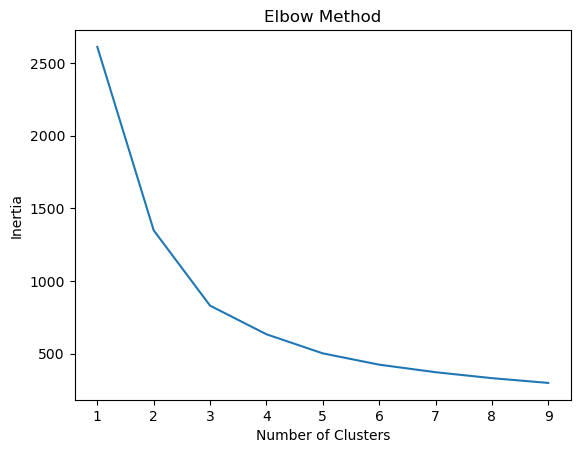

In [5]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Step 1: Import the necessary libraries (if not already imported)
n_components = 2  # Number of components for TruncatedSVD
n_clusters_range = range(1, 10)  # Adjust the range as needed

svd = TruncatedSVD(n_components=n_components, random_state=0)
Y_svd = svd.fit_transform(tfidf_matrix)

kmeans = [KMeans(n_clusters=i, max_iter=600) for i in n_clusters_range]

score = [kmeans[i].fit(Y_svd).inertia_ for i in range(len(kmeans))]  # Added a closing parenthesis here

plt.plot(n_clusters_range, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [6]:
# Step 2: Choose the number of clusters (k)
k = 3  # You can adjust the number of clusters based on your problem

# Step 3: Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(tfidf_matrix)

# Get the cluster assignments for each document
cluster_assignments = kmeans.labels_

In [ ]:
# 4.1. Print the cluster assignments for each document
for i in range(k):
    cluster_i_indices = np.where(cluster_assignments == i)[0]
    print(f"Cluster {i} documents:")
    for doc_index in cluster_i_indices:
        print(reviews_docs_joined[doc_index])
    print("\n")

In [ ]:
# 4.2. Analyze cluster centroids
cluster_centroids = kmeans.cluster_centers_

In [ ]:
# 4.3. Get the top terms for each cluster
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = cluster_centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster {i} top terms:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(top_terms)
    print("\n")

In [ ]:
# 4.4. Evaluate the clustering quality (if you have ground truth labels)
# You can use metrics like silhouette score, completeness, or homogeneity.

#silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_assignments)
print(f"Silhouette Score: {silhouette_avg}")

## Bigram

In [7]:
import gensim
from gensim import corpora

# Build the bigram and trigram models
bigram = gensim.models.Phrases(reviews_docs, min_count=5, threshold=100) # higher threshold fewer phrases. 

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [8]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [9]:
data_words_bigrams = make_bigrams(reviews_docs)